# Iris Classification

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Loading the dataset from scikit-learn

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

Converting the dataset into Pandas dataframe

In [3]:
df1 = pd.DataFrame(data.data, columns = data.feature_names)
df2 = pd.DataFrame(data.target, columns = ['target'])

frames = [df1, df2]


df = pd.concat([df1, df2], axis = 1)

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

## Knowing the data

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [28]:
df1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

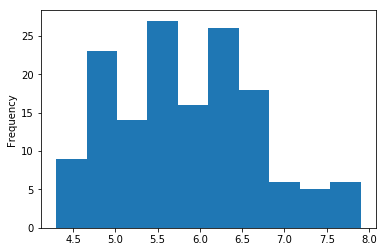

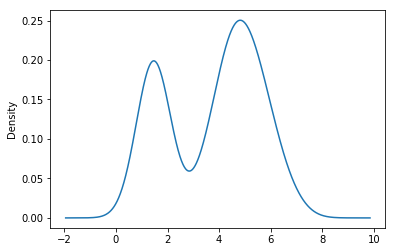

In [9]:
df['sepal length (cm)'].plot.hist()
plt.show()
df['petal length (cm)'].plot.kde()
plt.show()

## Plotting the data

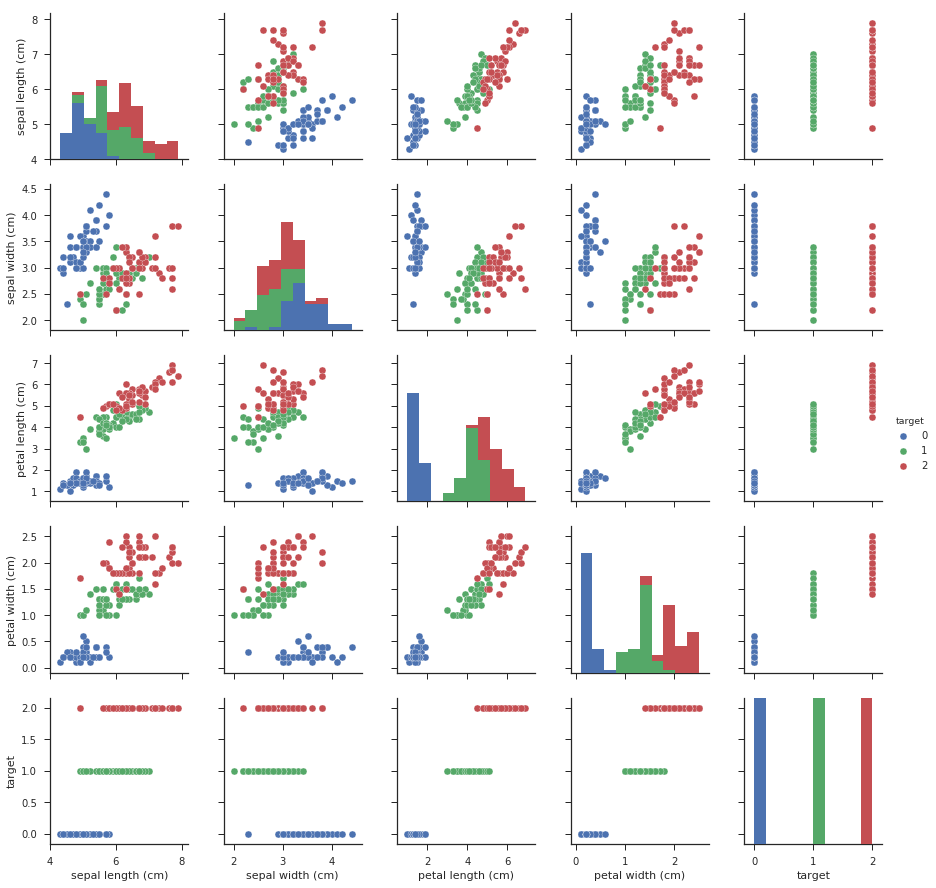

In [27]:
sns.set(style = "ticks")
sns.pairplot(df, hue="target")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

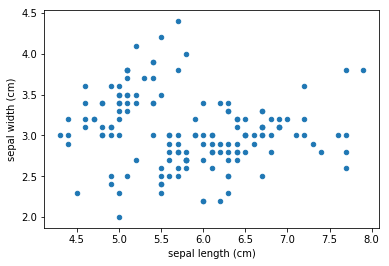

In [10]:
df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)')
plt.show

### Studying from Graph

From the graphs its clearly 

## Training 

In [5]:
X = df1
y = df2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.6,test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, random_state=0, train_size = 0.5,test_size=0.5)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
score_knn = knn.score(X_cv, y_cv)

print(score_knn*100)

86.66666666666667


/home/anchit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 82 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


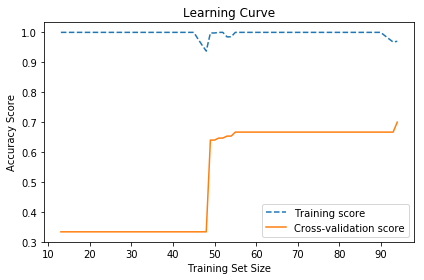

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=6), 
                                                        X,y,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 0.7, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [9]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB().fit(X_train, y_train)
score_naive = gaussian.score(X_cv, y_cv)
print(score_naive)

0.9333333333333333


/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
